In [1]:
from spectral import *
import spectral.io.envi as envi
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

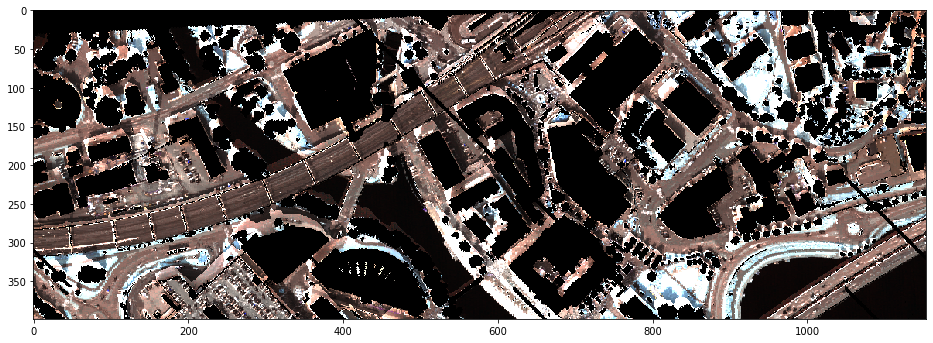

In [3]:
image = envi.open('../../hyperImage/reflectance/09_swir_ROAD_MASKED_POLISHED.hdr', 
                  '../../hyperImage/reflectance/09_swir_ROAD_MASKED_POLISHED')
img = image.load()
view = imshow(img, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)), figsize=(16, 16))

In [4]:
image.shape

(399, 1154, 288)

In [5]:
#compute PCA on the image 
pc = principal_components(image)
pc_0999 = pc.reduce(fraction=0.999)
img_pc = pc_0999.transform(image)
img_pc.shape

Covariance.....  0.0Covariance.....  0.0Covariance.....done  


(399, 1154, 68)

In [5]:
pc_img = img_pc.load()

In [6]:
#pc_img_use = pc_img[:,:, :5]
#pc_img_use.shape

In [7]:
## Combine PCA
df_pca = pd.DataFrame(pc_img.reshape(-1, pc_img.shape[2]))
string = "PC"
df_pca.columns = [string + str(n) for n in range(1, pc_img.shape[2]+1)]
#Concatenate 3 dataframe 
main_df = pd.concat([df_pca], axis=1, sort=False)

In [8]:
main_df

PC1           PC2           PC3           PC4          PC5  \
0       18775.594580  -7471.200254   1044.193671   -602.405613  -257.545580   
1       18775.594580  -7471.200254   1044.193671   -602.405613  -257.545580   
2       18775.594580  -7471.200254   1044.193671   -602.405613  -257.545580   
3       18775.594580  -7471.200254   1044.193671   -602.405613  -257.545580   
4       18775.594580  -7471.200254   1044.193671   -602.405613  -257.545580   
...              ...           ...           ...           ...          ...   
460441  -4050.100806  20173.660293  17794.477320 -16012.544629  3066.322069   
460442   2847.434685  13808.837226   4916.699941  -4743.120941  2495.209564   
460443   2860.008043  13810.999879   4921.674928  -4737.414936  2492.873937   
460444    111.857020  15117.631325  10438.726121  -5883.598554  7173.871337   
460445    128.451349  15090.299069  10448.384691  -5894.429691  7165.938721   

                 PC6          PC7          PC8          PC9         PC10  ...  \
0         -72.396118  -139.255831   -38.813352   -75.538071   -39.446575  ...   
1         -72.396118  -139.255831   -38.813352   -75.538071   -39.446575  ...   
2         -72.396118  -139.255831   -38.813352   -75.538071   -39.446575  ...   
3         -72.396118  -139.255831   -38.813352   -75.538071   -39.446575  ...   
4         -72.396118  -139.255831   -38.813352   -75.538071   -39.446575  ...   
...              ...          ...          ...          ...          ...  ...   
460441   1958.637088  1196.605493   164.823982  -900.664139 -1597.530138  ...   
460442   3437.714531  4047.793635   508.220874 -4527.479887   471.569913  ...   
460443   3437.883524  4049.101840   507.608016 -4526.313100   469.993102  ...   
460444 -10681.232735   986.549623  7099.759874  2118.079220   592.599558  ...   
460445 -10685.413679   982.567727  7097.859163  2118.540997   592.019345  ...   

               PC59        PC60         PC61        PC62         PC63  \
0         -0.018010   -0.263235     0.078746   -0.066155     0.046408   
1         -0.018010   -0.263235     0.078746   -0.066155     0.046408   
2         -0.018010   -0.263235     0.078746   -0.066155     0.046408   
3         -0.018010   -0.263235     0.078746   -0.066155     0.046408   
4         -0.018010   -0.263235     0.078746   -0.066155     0.046408   
...             ...         ...          ...         ...          ...   
460441  1298.208622  814.486766  -457.986260 -232.903069 -1584.264909   
460442  -617.466047  -28.334089  -357.346038 -569.816209  -649.225645   
460443  -618.227131  -27.973008  -357.630243 -570.376014  -649.279972   
460444  -272.343463 -272.100903 -1063.265061 -684.859868 -1245.293352   
460445  -272.326885 -272.080824 -1063.303619 -684.858149 -1245.316293   

              PC64        PC65        PC66        PC67        PC68  
0         0.126479    0.363204    0.050293    0.234810    0.044062  
1         0.126479    0.363204    0.050293    0.234810    0.044062  
2         0.126479    0.363204    0.050293    0.234810    0.044062  
3         0.126479    0.363204    0.050293    0.234810    0.044062  
4         0.126479    0.363204    0.050293    0.234810    0.044062  
...            ...         ...         ...         ...         ...  
460441  578.598451 -999.323599  -53.692393 -360.717602 -177.942402  
460442  127.075235   24.912871 -122.795350 -236.589963  585.590850  
460443  127.543590   25.356984 -121.537570 -236.712527  585.594977  
460444  276.602171 -470.460190 -408.657624  382.508896  317.690045  
460445  276.401273 -470.839003 -408.991851  382.346882  317.627168  

[460446 rows x 68 columns]

In [9]:
## Class image
gt_data = Image.open('../hyperImage/reflectance/roi/swir_class.tif')

gt = np.array(gt_data)
gt.shape

(399, 1154)

In [10]:
np.unique(gt)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [11]:
df_class = pd.DataFrame(gt.reshape(-1, 1))
string = "Target"
df_class.columns = [string]

# Using only hyperspectral data 

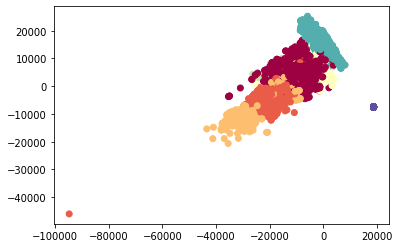

In [12]:
df = pd.concat([main_df, df_class], axis=1, sort=False)
df_masked = df[(df[['Target']] != 0).all(axis=1)]
X = df_masked.drop(columns=['Target']).values
y = df_masked['Target'].values
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')
plt.show()

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1844.0]
    G: [0.0, 2507.0]
    B: [0.0, 2737.0]
>

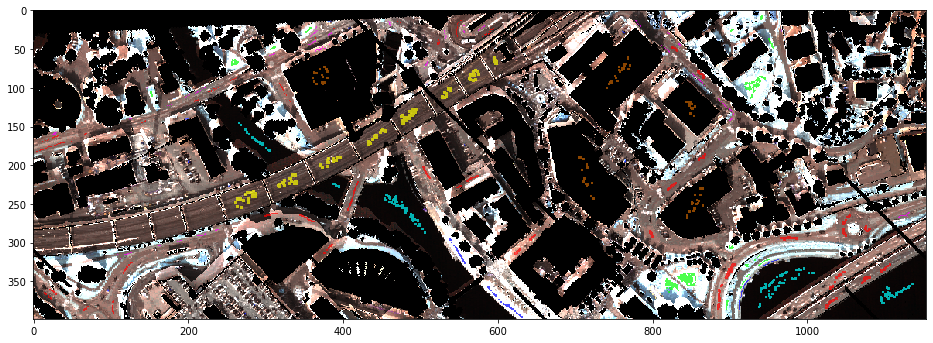

In [13]:
view = imshow(img, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)), figsize=(16, 16), classes=gt)
view.set_display_mode('overlay')
view.class_alpha = 0.7
view.show_data

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=0)

In [16]:
random_forest = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=6, n_jobs= -1)
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)
accuracy_score(y_test, pred)

0.9254941713127217

In [17]:
random_forest2 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=6, n_jobs= -1)
random_forest2.fit(X_scaled, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [18]:
X_data = df.drop(columns=['Target']).values
X_data_scaled = scaler.transform(X_data)

In [19]:
y_pred = random_forest2.predict(X_data_scaled)

In [20]:
predicted_hsi_mask = y_pred.reshape(img.shape[0], img.shape[1])

In [21]:
#full_image = envi.open('../hyperImage/reflectance/09_VNIR_POLISHED.hdr', '../hyperImage/reflectance/09_VNIR_POLISHED')
#view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_hsi_mask)
#view.set_display_mode('overlay')
#view.class_alpha = 1
#view.show_data

In [22]:
road = (predicted_hsi_mask == 1).astype(int)

In [23]:
from skimage.feature import canny
from skimage.viewer import ImageViewer
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.3,
)
#viewer = ImageViewer(edges)
#viewer.show()
road_edges = edges.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "
/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1844.0]
    G: [0.0, 2507.0]
    B: [0.0, 2737.0]
>

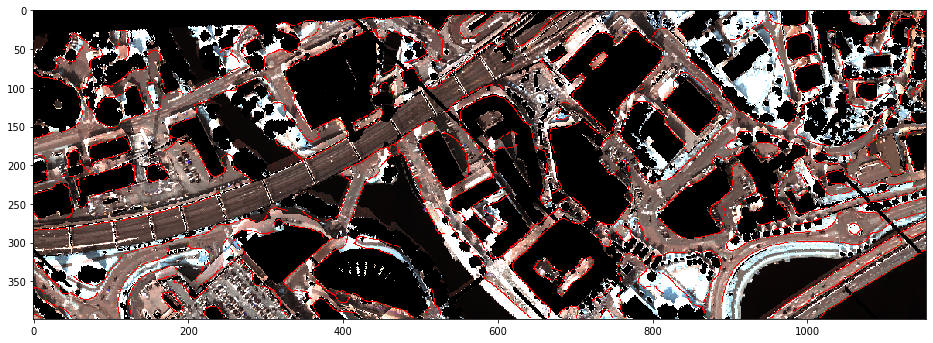

In [24]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road_edges)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1844.0]
    G: [0.0, 2507.0]
    B: [0.0, 2737.0]
>

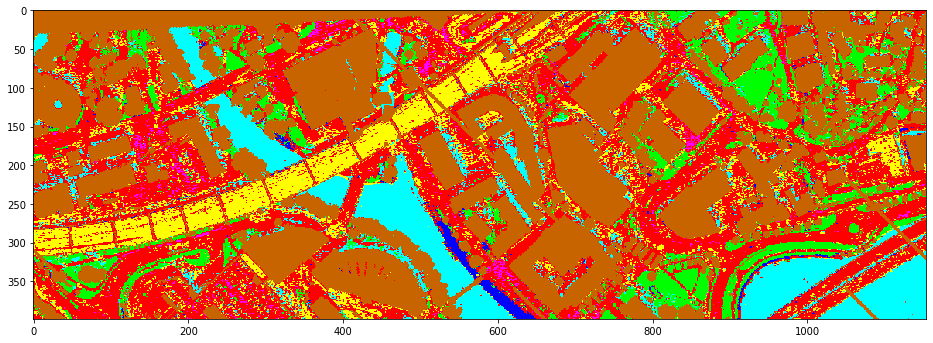

In [25]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_hsi_mask)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

# Using Lidar Data Only

In [26]:
#import lidar dem and intensity image 
l_intensity_data = Image.open('../hyperImage/reflectance/roi/swir_intensity.tif')
l_intensity = np.array(l_intensity_data)
df_intensity = pd.DataFrame(l_intensity.reshape(-1, 1))
string = "Lidar Intensity"
df_intensity.columns = [string]

l_dsm_data = Image.open('../hyperImage/reflectance/roi/swir_dem.tif')
l_dsm = np.array(l_dsm_data)
df_dsm = pd.DataFrame(l_dsm.reshape(-1, 1))
string = "Lidar nDSM"
df_dsm.columns = [string]

In [27]:
df_lidar = pd.concat([df_intensity, df_dsm, df_class], axis=1, sort=False)
df_lidar_masked =  df_lidar[(df_lidar[['Target']] != 0).all(axis=1)]
X = df_lidar_masked.drop(columns=['Target']).values
y = df_lidar_masked['Target'].values

In [28]:
df_intensity.shape

(460446, 1)

In [29]:
scaler1 = MinMaxScaler()
scaler1.fit(X)
X_scaled = scaler1.transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=0)

In [31]:
random_forest2 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest2.fit(X_train, y_train)
pred = random_forest2.predict(X_test)
accuracy_score(y_test, pred)

0.6817029903699949

In [32]:
random_forest3 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest3.fit(X_scaled, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
X_lidar_data = df_lidar.drop(columns=['Target']).values
S_lidar_data_scaled = scaler1.transform(X_lidar_data)
y_pred_lidar = random_forest3.predict(S_lidar_data_scaled)
predicted_lidar_mask = y_pred_lidar.reshape(l_intensity.shape[0], l_intensity.shape[1])

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1844.0]
    G: [0.0, 2507.0]
    B: [0.0, 2737.0]
>

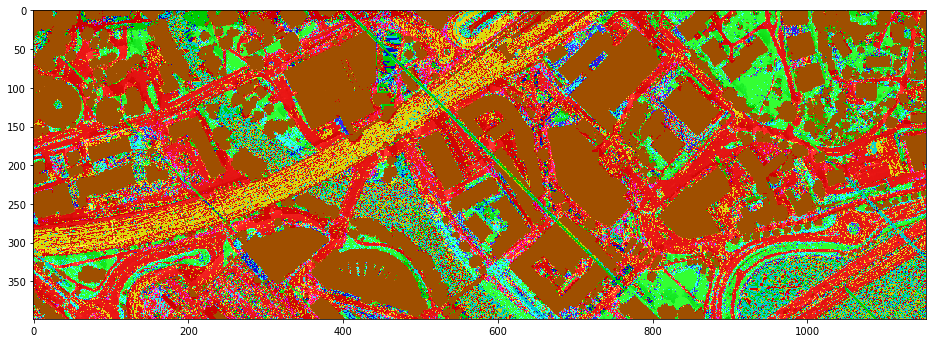

In [34]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_lidar_mask)
view.set_display_mode('overlay')
view.class_alpha = 0.8
view.show_data

In [35]:
road = (predicted_lidar_mask == 1).astype(int)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.viewer import ImageViewer
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.3,
)

road_edges = edges.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1844.0]
    G: [0.0, 2507.0]
    B: [0.0, 2737.0]
>

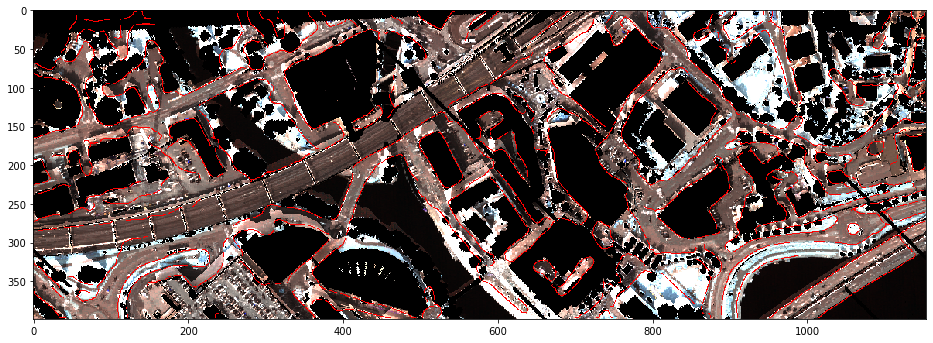

In [37]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road_edges)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

# Using  hyperspectral and lidar data 

In [38]:
#merge with HSI dataframe and lidar dataframe

In [39]:
df_lid_hsi = pd.concat([main_df, df_intensity, df_dsm, df_class], axis=1, sort=False)

In [40]:
df_masked =  df_lid_hsi[(df_lid_hsi[['Target']] != 0).all(axis=1)]
X = df_masked.drop(columns=['Target']).values
y = df_masked['Target'].values

In [41]:
scaler3 = MinMaxScaler()
scaler3.fit(X)
X_scaled = scaler3.transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=0)
random_forest3 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest3.fit(X_train, y_train)
pred = random_forest3.predict(X_test)
accuracy_score(y_test, pred)

0.9391789153573239

In [43]:
random_forest3 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest3.fit(X_scaled, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [44]:
X_data = df_lid_hsi.drop(columns=['Target']).values
X_data_scaled = scaler3.transform(X_data)

In [45]:
y_pred = random_forest3.predict(X_data_scaled)

In [46]:
predicted_hsi_lidar_mask = y_pred.reshape(l_intensity.shape[0], l_intensity.shape[1])

In [47]:
road = (predicted_hsi_lidar_mask == 1).astype(int)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.viewer import ImageViewer
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.4,
)
road_edges = edges.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1844.0]
    G: [0.0, 2507.0]
    B: [0.0, 2737.0]
>

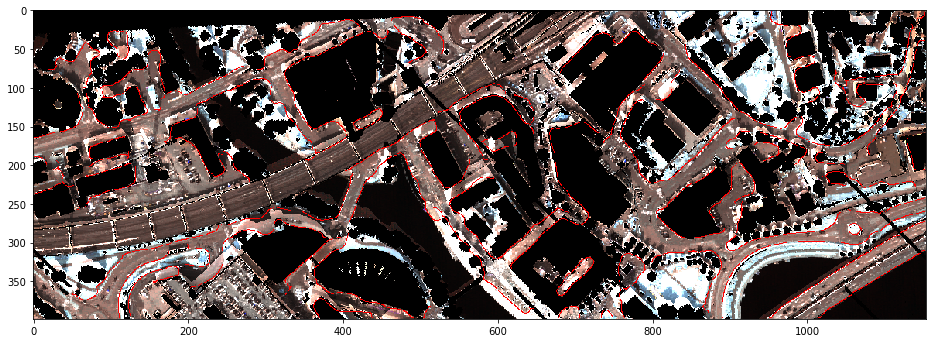

In [49]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road_edges)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1844.0]
    G: [0.0, 2507.0]
    B: [0.0, 2737.0]
>

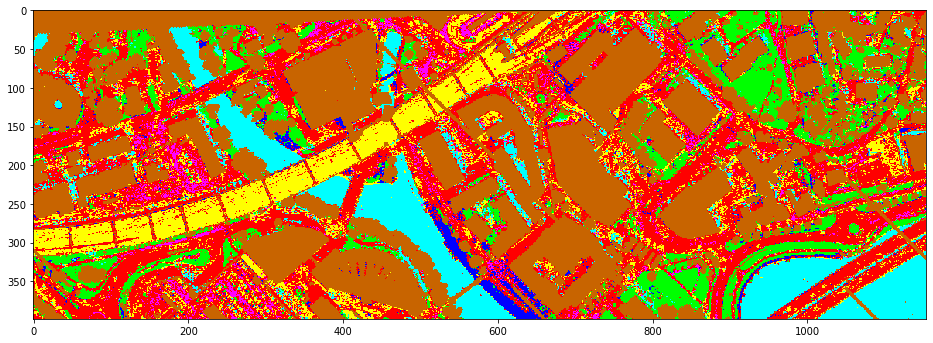

In [50]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_hsi_lidar_mask)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

# Validation data

In [51]:
val_image = envi.open('../hyperImage/reflectance/swir/08_clipped_road.hdr', '../hyperImage/reflectance/swir/08_clipped_road.')
val_img = val_image.load()
val_img.shape

(342, 983, 288)

In [52]:
#compute PCA on the image 
pc = principal_components(val_image)
pc_0999 = pc.reduce(fraction=0.999)
val_img_pc = pc_0999.transform(val_image)
val_img_pc.shape

Covariance.....  0.0Covariance.....  0.0Covariance.....done  


(342, 983, 68)

In [53]:
l_intensity_data = Image.open('../hyperImage/reflectance/swir/intensity.tif')
l_intensity = np.array(l_intensity_data)
df_intensity = pd.DataFrame(l_intensity.reshape(-1, 1))
string = "Lidar Intensity"
df_intensity.columns = [string]

l_dsm_data = Image.open('../hyperImage/reflectance/swir/nDSM.tif')
l_dsm = np.array(l_dsm_data)
df_dsm = pd.DataFrame(l_dsm.reshape(-1, 1))
string = "Lidar nDSM"
df_dsm.columns = [string]

In [54]:
l_dsm.shape

(342, 983)

In [55]:
## Combine PCA,and ndvi DATA
pc_img = val_img_pc.load()
df_pca = pd.DataFrame(pc_img.reshape(-1, val_img_pc.shape[2]))
string = "PC"
df_pca.columns = [string + str(n) for n in range(1, val_img_pc.shape[2]+1)]
#Concatenate 3 dataframe 
main_df = pd.concat([df_pca], axis=1, sort=False)

In [56]:
df_lid_hsi = pd.concat([main_df, df_intensity, df_dsm], axis=1, sort=False)

In [57]:
df_lid_hsi.head(5)

PC1          PC2          PC3         PC4        PC5        PC6  \
0  18775.59458 -7471.200254  1044.193671 -602.405613 -257.54558 -72.396118   
1  18775.59458 -7471.200254  1044.193671 -602.405613 -257.54558 -72.396118   
2  18775.59458 -7471.200254  1044.193671 -602.405613 -257.54558 -72.396118   
3  18775.59458 -7471.200254  1044.193671 -602.405613 -257.54558 -72.396118   
4  18775.59458 -7471.200254  1044.193671 -602.405613 -257.54558 -72.396118   

          PC7        PC8        PC9       PC10  ...      PC61      PC62  \
0 -139.255831 -38.813352 -75.538071 -39.446575  ...  0.078746 -0.066155   
1 -139.255831 -38.813352 -75.538071 -39.446575  ...  0.078746 -0.066155   
2 -139.255831 -38.813352 -75.538071 -39.446575  ...  0.078746 -0.066155   
3 -139.255831 -38.813352 -75.538071 -39.446575  ...  0.078746 -0.066155   
4 -139.255831 -38.813352 -75.538071 -39.446575  ...  0.078746 -0.066155   

       PC63      PC64      PC65      PC66     PC67      PC68  Lidar Intensity  \
0  0.046408  0.126479  0.363204  0.050293  0.23481  0.044062             16.0   
1  0.046408  0.126479  0.363204  0.050293  0.23481  0.044062             15.0   
2  0.046408  0.126479  0.363204  0.050293  0.23481  0.044062             16.0   
3  0.046408  0.126479  0.363204  0.050293  0.23481  0.044062             19.0   
4  0.046408  0.126479  0.363204  0.050293  0.23481  0.044062             17.0   

   Lidar nDSM  
0   29.959999  
1   29.940001  
2   29.940001  
3   29.910000  
4   29.920000  

[5 rows x 70 columns]

In [58]:
X_data_scaled = scaler3.transform(df_lid_hsi)

In [59]:
val_pred_full = random_forest3.predict(X_data_scaled)

In [60]:
predicted_hsi_lidar_mask_val = val_pred_full.reshape(l_dsm.shape[0], l_dsm.shape[1])

In [61]:
val_full_image = envi.open('../hyperImage/reflectance/swir/08_cliped.hdr', '../hyperImage/reflectance/swir/08_cliped.')


In [62]:
val_full_image.shape

(342, 983, 288)

In [63]:
road = (predicted_hsi_lidar_mask_val == 1).astype(int)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.viewer import ImageViewer
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.4,
)
road_edges = edges.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


In [65]:
val_full_image.shape

(342, 983, 288)

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [14.0, 4377.0]
    G: [24.0, 5432.0]
    B: [22.0, 5639.0]
>

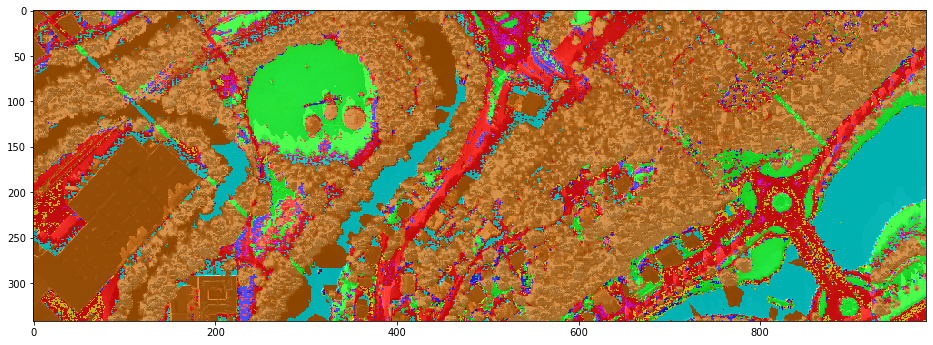

In [72]:
view = imshow(val_full_image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_hsi_lidar_mask_val)
view.set_display_mode('overlay')
view.class_alpha = 0.7
view.show_data

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [14.0, 4377.0]
    G: [24.0, 5432.0]
    B: [22.0, 5639.0]
>

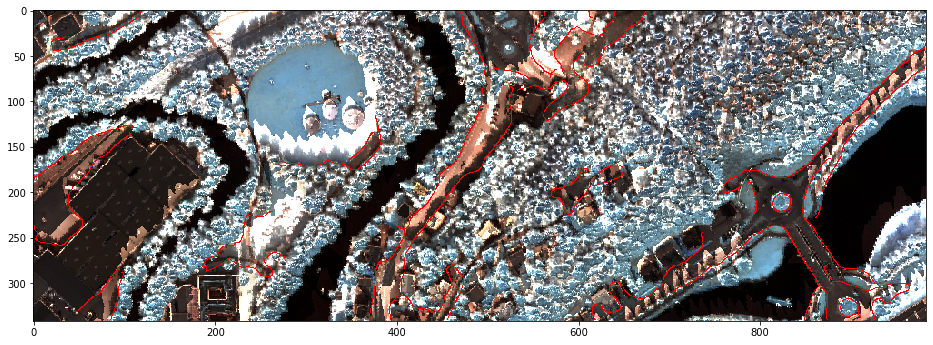

In [73]:
view = imshow(val_full_image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road_edges)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data